# Brief Overview:
Dataset ▶ <br>
Question.csv<br>
answer.csv <br>tag.csv<br>
▶**Multi-class-Multi-label classification**: In deep learning, a multi-class multi-label prediction problem is one where each sample/observation in the dataset can belong to multiple classes simultaneously. This contrasts with a simple multi-class prediction problem, where each sample belongs to exactly one of several possible classes. <br>
**Sigmoid Activation** is used for output. The sigmoid function is used in multi-label classification because it outputs probabilities between 0 and 1 for each class independently. This allows each class to be predicted independently, fitting the scenario where a sample can belong to multiple classes at the same time.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
#import string
#from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
#from collections import Counter

from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, SimpleRNN,Dense,Dropout,BatchNormalization,Input,Embedding
from tensorflow.keras.models import Model


In [ ]:
!wget https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0

--2025-03-03 19:47:12--  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bnabda9cee2yuyi6wesmv/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z&dl=0 [following]
--2025-03-03 19:47:12--  https://www.dropbox.com/scl/fi/bnabda9cee2yuyi6wesmv/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb58d8955ebb5811e008e3bd361.dl.dropboxusercontent.com/cd/0/inline/ClM7xkuP8FQUIpjPjus1vZv1WWm6zkQJael3_WvpfGYrJusRXbb6B12uP9X9QLMfkhcQqZBexBiwg3wzQcIWFWU5VYJ2FZxzenUywlfgHwlTogqGTw06vYhqBnO1ExpD6jA/file# [following]
--2025-03-03 19:47:13--  https://ucb58d8955ebb5811e008e3bd361.dl.dropboxusercontent.com/cd/0/inlin

In [ ]:
!unzip /content/stacksample.zip?dl=0

Archive:  /content/stacksample.zip?dl=0
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [ ]:
questions = pd.read_csv('/content/Questions.csv', encoding='latin-1')

answers = pd.read_csv('/content/Answers.csv', encoding='latin-1')

tags = pd.read_csv('/content/Tags.csv')

In [ ]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [ ]:
answers.head(3)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...


In [ ]:
tags.head(10)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
5,90,branch
6,90,branching-and-merging
7,120,sql
8,120,asp.net
9,120,sitemap


In [ ]:
questions.isna().sum()

,0
Id,0
OwnerUserId,14454
CreationDate,0
ClosedDate,1208257
Score,0
Title,0
Body,0


In [ ]:
answers.isna().sum()

,0
Id,0
OwnerUserId,13200
CreationDate,0
ParentId,0
Score,0
Body,0


In [ ]:
tags.isna().sum()

,0
Id,0
Tag,1113


In [ ]:
tags.Id.nunique()

1264216

In [ ]:
questions.Id.nunique()

1264216

In [ ]:
target = tags.dropna(axis=0, how='any', inplace=False)
target.isna().sum()

,0
Id,0
Tag,0


In [ ]:
print(f'shape of target data : {target.shape}')
print(f'shape of questions data : {questions.shape}')

shape of target data : (3749881, 2)
shape of questions data : (1264216, 7)


In [ ]:
df_grouped = target.groupby('Id')['Tag'].apply(lambda x: ','.join(x)).reset_index()
df_grouped.head()

,Id,Tag
0,80,"flex,actionscript-3,air"
1,90,"svn,tortoisesvn,branch,branching-and-merging"
2,120,"sql,asp.net,sitemap"
3,180,"algorithm,language-agnostic,colors,color-space"
4,260,"c#,.net,scripting,compiler-construction"


In [ ]:
df_grouped.shape

(1264214, 2)

In [ ]:
questions.shape

(1264216, 7)

In [ ]:
df_grouped.Tag.nunique()

685263

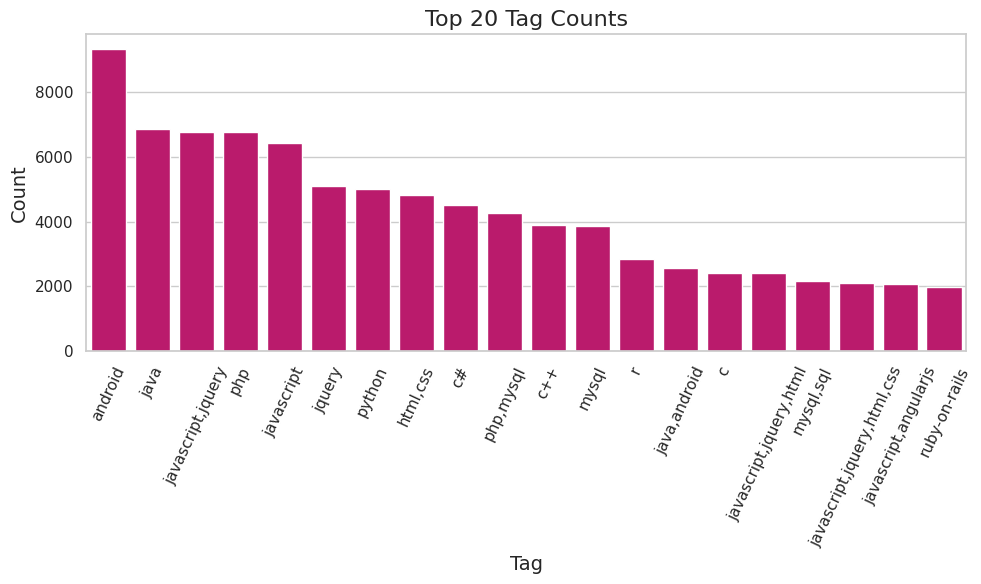

In [ ]:
tag_counts = df_grouped.Tag.value_counts().head(20).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.barplot(x=tag_counts.index, y=tag_counts.values, color='#D5006D');

plt.title('Top 20 Tag Counts', fontsize=16)
plt.xticks(rotation=65)
plt.xlabel('Tag', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show();

In [ ]:
merged_df = pd.merge(questions, df_grouped, on='Id', how='inner')
merged_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"flex,actionscript-3,air"
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"svn,tortoisesvn,branch,branching-and-merging"
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"sql,asp.net,sitemap"
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"algorithm,language-agnostic,colors,color-space"
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"c#,.net,scripting,compiler-construction"


In [ ]:
top_tags = tag_counts.index

In [ ]:
top_tags

Index(['android', 'java', 'javascript,jquery', 'php', 'javascript', 'jquery',
       'python', 'html,css', 'c#', 'php,mysql', 'c++', 'mysql', 'r',
       'java,android', 'c', 'javascript,jquery,html', 'mysql,sql',
       'javascript,jquery,html,css', 'javascript,angularjs', 'ruby-on-rails'],
      dtype='object', name='Tag')

In [ ]:
new_df = merged_df[merged_df['Tag'].isin(top_tags)]
new_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Tag
34,2900,454.0,2008-08-05T21:45:11Z,NaN,14,MySQL/Apache Error in PHP MySQL query,<p>I am getting the following error:</p>\n\n<b...,"php,mysql"
135,13000,103.0,2008-08-16T05:05:09Z,NaN,4,How to setup site-wide variables in php?,<p>I want to define something like this in <em...,php
192,17870,2116.0,2008-08-20T12:58:51Z,NaN,11,Select ..... where .... OR,<p>Is there a way to select data where any one...,mysql
195,17980,2128.0,2008-08-20T13:44:34Z,NaN,4,What Comes After The %?,<p>I've searched for this a little but I have ...,c
205,19280,184.0,2008-08-21T03:20:05Z,NaN,16,Code to ask yes/no question in javascript,<p>I could only find the function <code>confir...,javascript


In [ ]:
new_df.shape

(86236, 8)

In [ ]:
# Split the tags (comma-separated) into lists
new_df['Tag'] = new_df['Tag'].apply(lambda x: x.split(','))

<ipython-input-25-c906e60d374c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tag'] = new_df['Tag'].apply(lambda x: x.split(','))


In [ ]:
new_df.Tag.head(3)

,Tag
34,"[php, mysql]"
135,[php]
192,[mysql]


In [ ]:
new_df.Tag.value_counts().head(20).sort_values(ascending=False).index

Index([                            ['android'],
                                      ['java'],
                      ['javascript', 'jquery'],
                                       ['php'],
                                ['javascript'],
                                    ['jquery'],
                                    ['python'],
                               ['html', 'css'],
                                        ['c#'],
                              ['php', 'mysql'],
                                       ['c++'],
                                     ['mysql'],
                                         ['r'],
                           ['java', 'android'],
                                         ['c'],
              ['javascript', 'jquery', 'html'],
                              ['mysql', 'sql'],
       ['javascript', 'jquery', 'html', 'css'],
                   ['javascript', 'angularjs'],
                             ['ruby-on-rails']],
      dtype='object', name='Tag')

The MultiLabelBinarizer is a utility in the scikit-learn library for transforming a list of sets or lists of labels to a binary matrix, where each column represents a class, and each row represents an instance. If an instance belongs to a particular class, the corresponding cell in the matrix is 1; otherwise, it is 0. particularly useful for multi-label classification problems which  handle multiple labels for each instance.<br>Can also Inverse transform the binary matrix
original_labels = mlb.inverse_transform(binary_matrix)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb =MultiLabelBinarizer()
y = mlb.fit_transform(new_df['Tag'])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
y.shape

(86236, 16)

In [ ]:
print(mlb.classes_)

['android' 'angularjs' 'c' 'c#' 'c++' 'css' 'html' 'java' 'javascript'
 'jquery' 'mysql' 'php' 'python' 'r' 'ruby-on-rails' 'sql']


In [ ]:
# Remove html tags
import re

def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)

In [ ]:
# Remove url

def remove_url(text):
  pattern = re.compile(r'https?://\S+|www\.\S+')
  return pattern.sub(r'', text)

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
# Function to transform text (remove stopwords, punctuation, HTML tags, and URLs)
def transform_text(text):
  text = remove_html_tags(text)
  text = remove_url(text)

   # Split text into words, remove stopwords and non-alphanumeric words
  text = [word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS and word.isalnum()]

  # Join the words back into a cleaned string
  return " ".join(text)

In [ ]:
new_df['Body'] = new_df['Body'].apply(transform_text)
X = new_df['Body']

<ipython-input-37-8030aa944404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Body'] = new_df['Body'].apply(transform_text)


In [ ]:
X.head()

,Body
34,getting following Access denied user using fol...
135,want define like use variable marker like echo...
192,way select data multiple conditions occur typi...
195,searched little gotten particularly straight C...
205,function gives way


In [ ]:
X.shape

(86236,)

word cloud is a useful visualization tool for showing the frequency of words. Processing text data before generating word cloud.

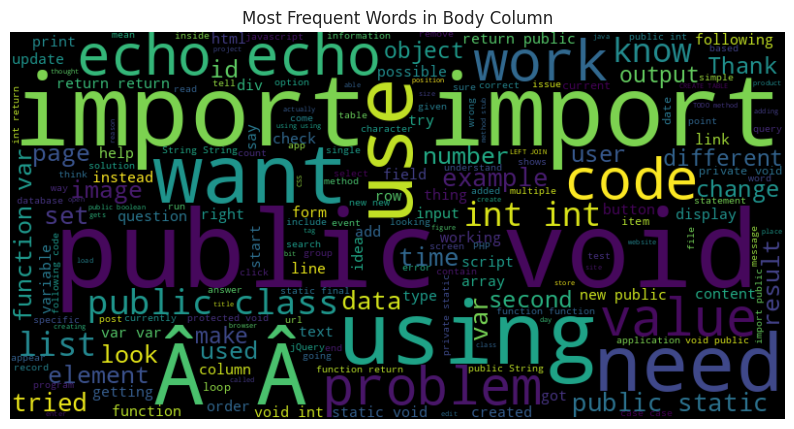

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(X.dropna())  # Combine all text into one string

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Frequent Words in Body Column')
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((68988,), (17248,), (68988, 16), (17248, 16))

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
sen_lens = []

for sent in X:
  sen_lens.append(len(word_tokenize(sent)))

In [ ]:
sen_lens[:10]

[41, 18, 27, 27, 3, 25, 38, 23, 28, 8]

In [ ]:
min(sen_lens),max(sen_lens),

(0, 2318)

In [ ]:
np.quantile(sen_lens, 0.95)

102.0

In [ ]:
seq_len = 102

In [ ]:
tok = Tokenizer(char_level=False, split=' ')
tok.fit_on_texts(X_train) # finds vocabulary/word and assigns int

In [ ]:
tok.index_word

{1: 'new',
 2: 'public',
 3: 'var',
 4: 'want',
 5: 'return',
 6: 'code',
 7: 'int',
 8: 'like',
 9: 'function',
 10: 'string',
 11: 'using',
 12: 'class',
 13: 'void',
 14: '1',
 15: '0',
 16: 'use',
 17: '2',
 18: 'file',
 19: 'need',
 20: 'import',
 21: 'trying',
 22: 'echo',
 23: 'data',
 24: 'table',
 25: 'user',
 26: 'value',
 27: 'way',
 28: 'just',
 29: 'know',
 30: 'private',
 31: 'error',
 32: 'help',
 33: 'following',
 34: '3',
 35: 'select',
 36: 'set',
 37: 'text',
 38: 'static',
 39: 'problem',
 40: 'make',
 41: 'does',
 42: 'tried',
 43: 'id',
 44: 'page',
 45: 'method',
 46: 'create',
 47: 'line',
 48: 'number',
 49: 'list',
 50: 'button',
 51: 'add',
 52: 'array',
 53: 'thanks',
 54: 'try',
 55: 'time',
 56: 'end',
 57: 'html',
 58: 'values',
 59: 'image',
 60: 'div',
 61: 'print',
 62: 'null',
 63: 'object',
 64: 'case',
 65: 'click',
 66: 'â',
 67: 'work',
 68: '4',
 69: 'input',
 70: 'working',
 71: 'jquery',
 72: 'works',
 73: 'query',
 74: 'change',
 75: 'getting'

In [ ]:
len(tok.index_word)

95635

In [ ]:
X_train.reset_index(drop=True, inplace=True)

In [ ]:
sequences_train = tok.texts_to_sequences(X_train)

In [ ]:
X_train[5]

'4 input Descrition Promo1 Promo2 Promo3 user Promo managed radio promos fields display according radio populate Description data Promo 2 based radio button'

In [ ]:
sequences_train[5]

[68,
 69,
 44107,
 44108,
 44109,
 44110,
 25,
 11408,
 1096,
 575,
 28305,
 267,
 91,
 605,
 575,
 1106,
 623,
 23,
 11408,
 17,
 184,
 575,
 50]

In [ ]:
sequence_train_padded = sequence.pad_sequences(sequences_train, maxlen = seq_len)

In [ ]:
sequence_train_padded.shape

(68988, 102)

In [ ]:
y.shape[1]

16

In [ ]:
y_train.shape[1]

16

# RNN

In [ ]:
inputs = Input(shape=[seq_len], name='input')
embeded_layer = Embedding(input_dim= len(tok.index_word)+1, output_dim=100, mask_zero=True, name='embeded_layer')(inputs)

rnn_layer = SimpleRNN(units=64, name='rnn_layer')(embeded_layer)

dense1 = Dense(units=32, activation='relu', name='dense1')(rnn_layer)
batch1 = BatchNormalization(name='batch1')(dense1)
drop1 = Dropout(rate=0.25, name='drop1')(batch1)

output = Dense(units=y.shape[1], activation='sigmoid', name='output')(drop1)

model = Model(inputs=inputs, outputs=output)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 102)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeded_layer (Embedding) │ (None, 102, 100)       │      9,563,600 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal (NotEqual)      │ (None, 102)            │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rnn_layer (SimpleRNN)     │ (None, 64)             │         10,560 │ embeded_layer[0][0],   │
│                           │                        │                │ not_equal[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense1 (Dense)            │ (None, 32)             │          2,080 │ rnn_layer[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch1                    │ (None, 32)             │            128 │ dense1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ drop1 (Dropout)           │ (None, 32)             │              0 │ batch1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 16)             │            528 │ drop1[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 9,576,896 (36.53 MB)

 Trainable params: 9,576,832 (36.53 MB)

 Non-trainable params: 64 (256.00 B)

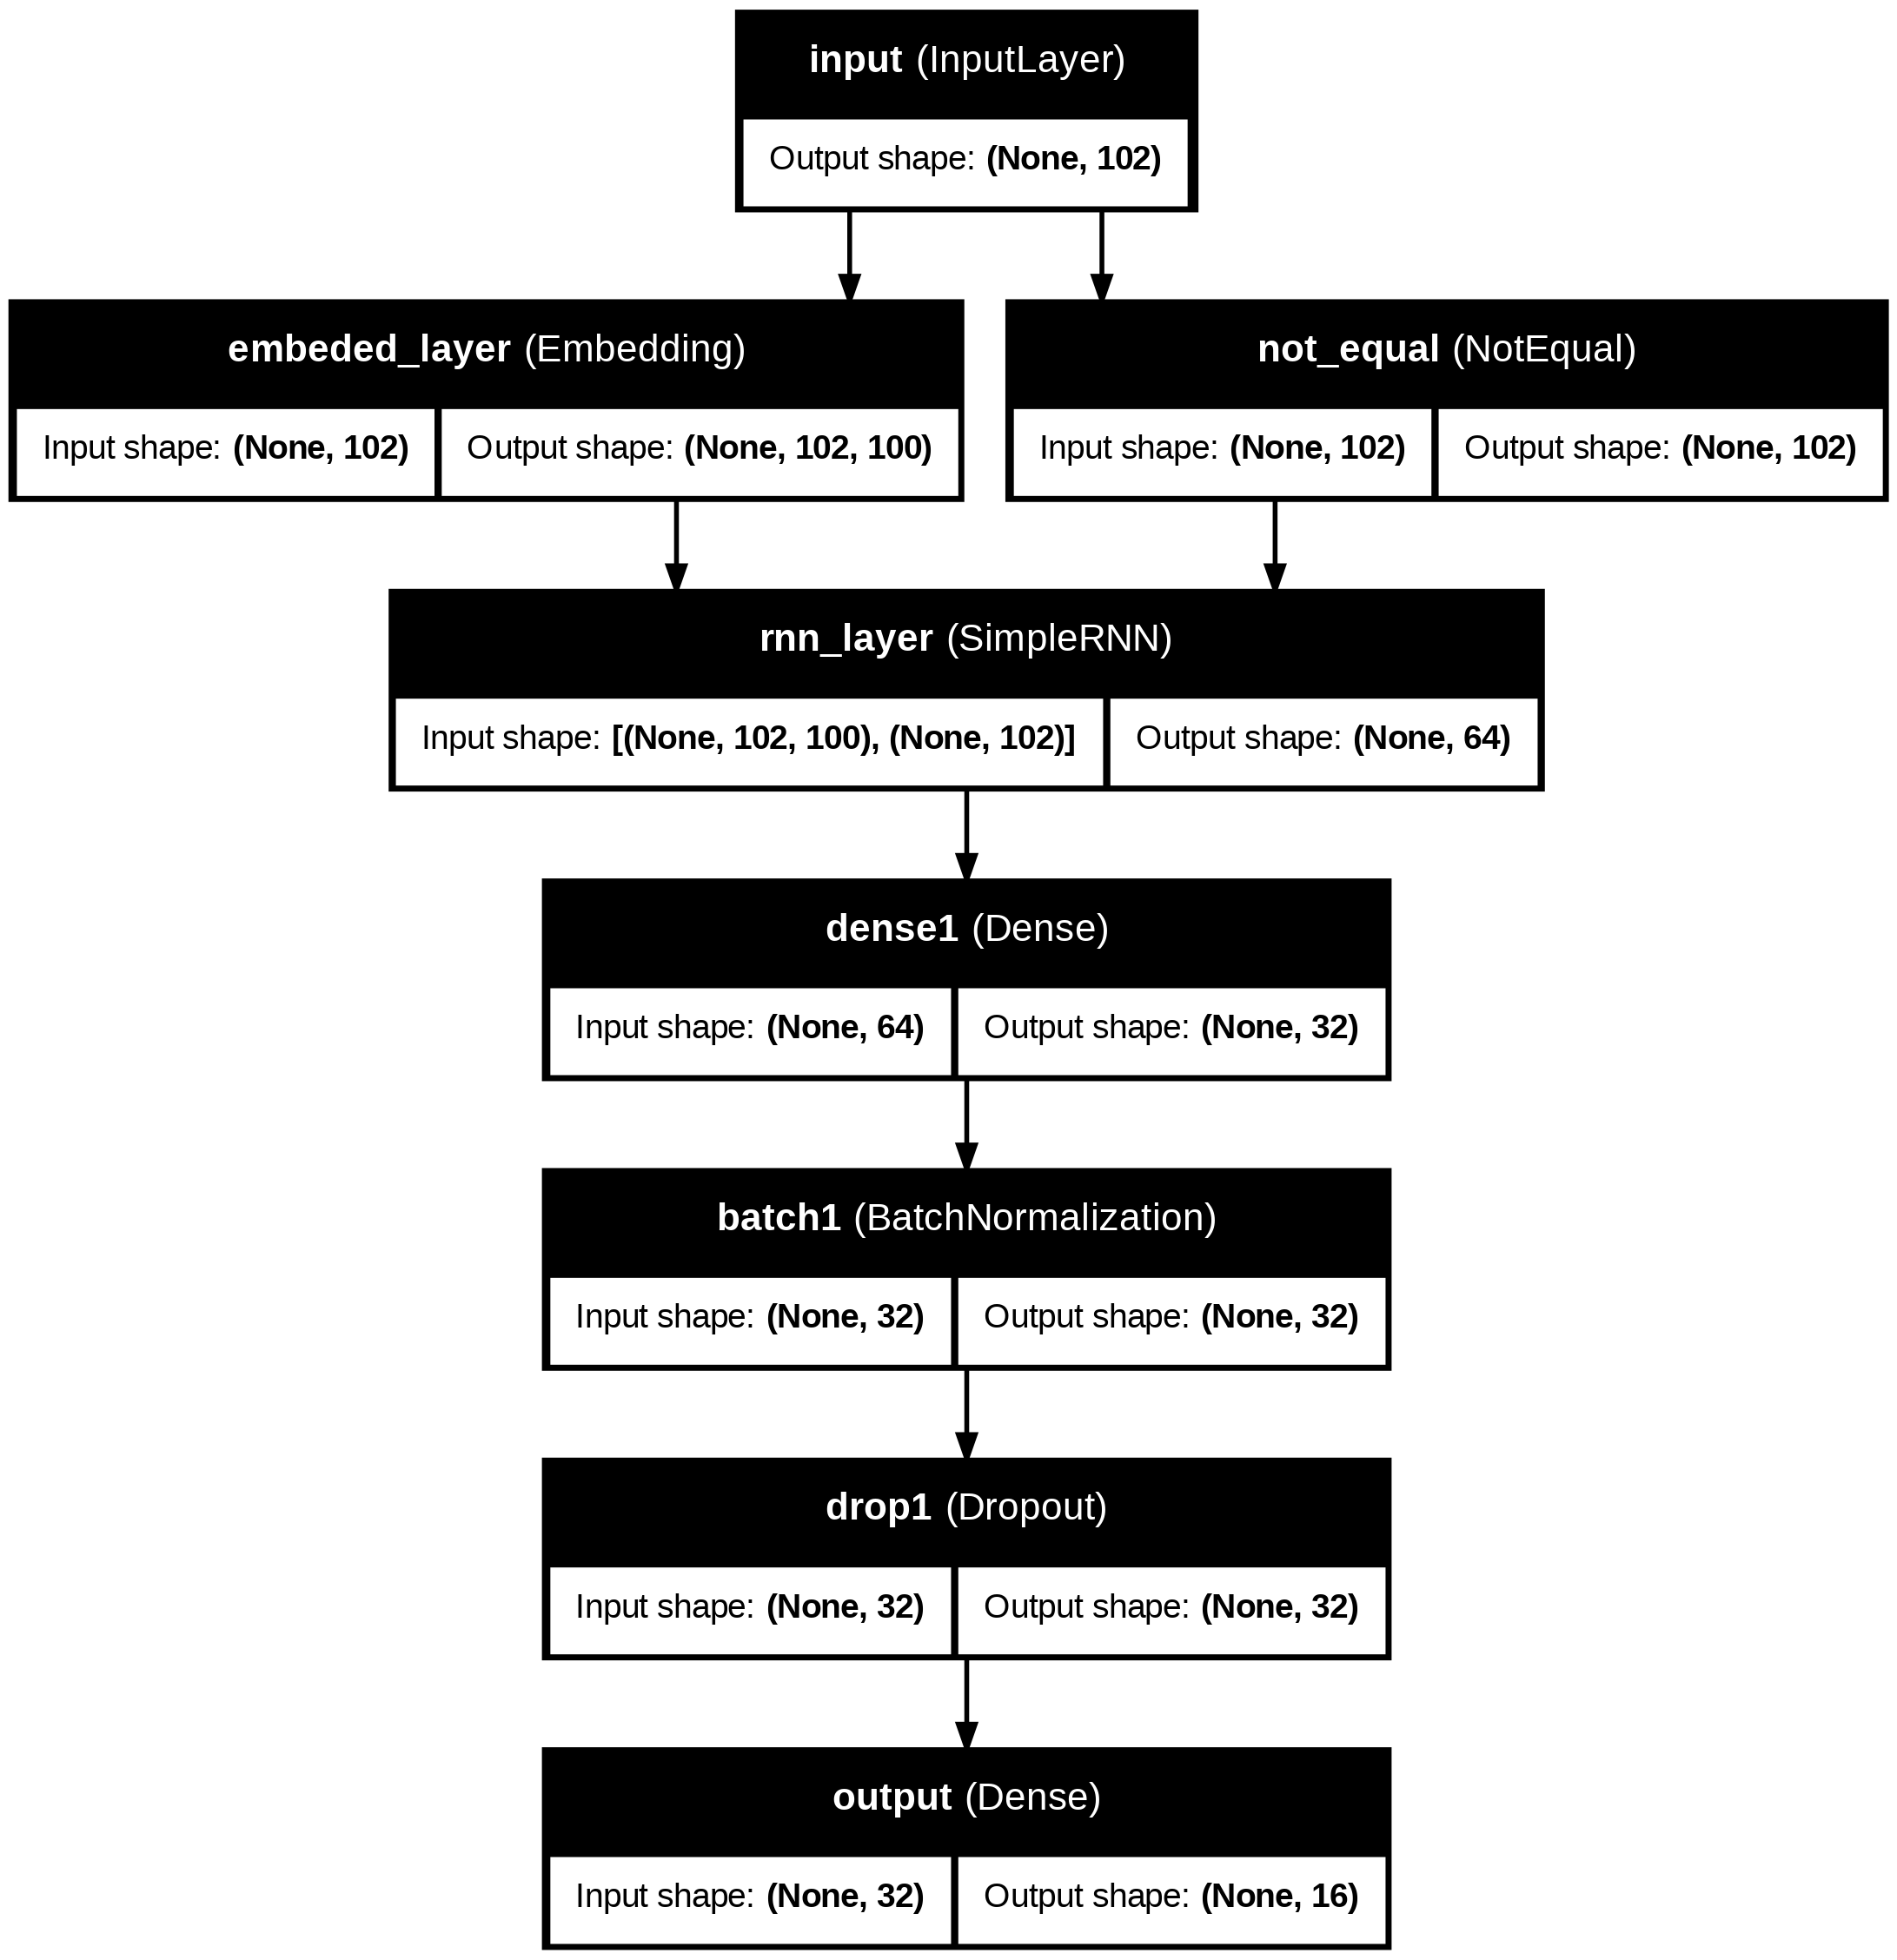

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
sequences_test = tok.texts_to_sequences(X_test)

In [ ]:
sequence_test_padded = sequence.pad_sequences(sequences_test,
                                              maxlen= seq_len)

In [ ]:
model.fit(sequence_train_padded, y_train, epochs=20, batch_size=128,
          validation_data=(sequence_test_padded, y_test), callbacks=[earlystop])

Epoch 1/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 130s 235ms/step - accuracy: 0.1564 - loss: 0.5146 - val_accuracy: 0.3789 - val_loss: 0.2109
Epoch 2/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 143s 237ms/step - accuracy: 0.3733 - loss: 0.2031 - val_accuracy: 0.4641 - val_loss: 0.1717
Epoch 3/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 128s 238ms/step - accuracy: 0.4818 - loss: 0.1695 - val_accuracy: 0.5150 - val_loss: 0.1629
Epoch 4/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 143s 239ms/step - accuracy: 0.5216 - loss: 0.1542 - val_accuracy: 0.5242 - val_loss: 0.1530
Epoch 5/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 142s 239ms/step - accuracy: 0.5515 - loss: 0.1414 - val_accuracy: 0.5395 - val_loss: 0.1521
Epoch 6/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 131s 243ms/step - accuracy: 0.5448 - loss: 0.1449 - val_accuracy: 0.4973 - val_loss: 0.1604
Epoch 7/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 140s 239ms/step - accuracy: 0.5918 - loss: 0.1237 - val_accuracy: 0.5204 - val_loss: 0.1517
Epoch 8/20
539/539 ━━━━━━━━━━━━━━━━━━━━ 153s 259ms/step - accuracy: 0.6221 -

In [ ]:
predictions = model.predict(sequence_test_padded, batch_size=128, verbose=0)

In [ ]:
predictions[:5]

array([[1.39160897e-03, 1.20011806e-01, 3.87433241e-03, 1.25933103e-02,
        6.04673941e-03, 8.94820504e-03, 2.78529748e-02, 9.33652651e-03,
        8.51485312e-01, 2.57235289e-01, 6.08911505e-05, 9.87803470e-03,
        6.15149317e-03, 1.02742412e-03, 6.80537289e-03, 7.51191546e-05],
       [1.25515433e-02, 2.81957705e-02, 1.90581626e-03, 1.31414207e-02,
        2.49396428e-03, 2.12767515e-02, 7.97359273e-02, 1.26649616e-02,
        7.40138471e-01, 5.83336353e-01, 6.71754766e-04, 4.31297114e-03,
        1.31884543e-03, 5.61170396e-04, 2.40090140e-03, 4.15844464e-04],
       [3.37287085e-03, 7.21780770e-03, 1.12252869e-01, 1.59639537e-01,
        1.10997505e-01, 7.52517197e-04, 9.53437237e-04, 3.28513756e-02,
        1.43368533e-02, 2.94061657e-03, 3.69392522e-02, 5.64377271e-02,
        1.03026710e-01, 1.73201874e-01, 1.67941839e-01, 1.06260525e-02],
       [1.71731610e-03, 2.26294305e-02, 2.19291658e-04, 1.47309410e-03,
        1.99071481e-04, 2.97206342e-01, 6.17827594e-01, 1.293

In [ ]:
# Convert probabilities to binary labels (0 or 1) using a threshold
threshold = 0.5
binary_predictions = (predictions >= threshold).astype(int)
print(binary_predictions[:10])

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Output the questions and corresponding predicted tags
for i, pred in enumerate(binary_predictions[:30]):  # Limiting to 30 for performance check
    question_text = X_test.iloc[i]
    predicted_tags = mlb.classes_[pred==1]
    print(f"Question: {question_text}")
    print(f"Predicted Tags: {predicted_tags}")
    print("-" * 50)


Question: table data view click need data db print getting data populating model data click model updated print shows old code newitems added items click HTML JS function function
Predicted Tags: ['javascript']
--------------------------------------------------
Question: focus created autocomplete menu tried Generaly mean custom
Predicted Tags: ['javascript' 'jquery']
--------------------------------------------------
Question: Intro code Message 1 error prohibited article Title short 5 Code 1 defining parameters class Article validates 5 end Code 2 error message prohibited article msg end
Predicted Tags: []
--------------------------------------------------
Question: trying add additional html image accept idea doing
Predicted Tags: ['html' 'javascript' 'jquery']
--------------------------------------------------
Question: task programme regarding task void char int char
Predicted Tags: []
--------------------------------------------------
Question: looping loop desired real project p

In [ ]:
# Output the binary predictions and corresponding tags
for i, pred in enumerate(binary_predictions):
  print(f"Question {i+1}: Predicted Tags: {mlb.classes_[pred==1]}")

Streaming output truncated to the last 5000 lines.
Question 12249: Predicted Tags: ['php']
Question 12250: Predicted Tags: []
Question 12251: Predicted Tags: ['javascript' 'jquery']
Question 12252: Predicted Tags: ['javascript' 'jquery']
Question 12253: Predicted Tags: ['python']
Question 12254: Predicted Tags: ['mysql']
Question 12255: Predicted Tags: ['php']
Question 12256: Predicted Tags: ['mysql']
Question 12257: Predicted Tags: ['javascript' 'jquery']
Question 12258: Predicted Tags: ['javascript' 'jquery']
Question 12259: Predicted Tags: ['javascript' 'jquery']
Question 12260: Predicted Tags: ['css' 'html']
Question 12261: Predicted Tags: []
Question 12262: Predicted Tags: []
Question 12263: Predicted Tags: ['javascript' 'jquery']
Question 12264: Predicted Tags: []
Question 12265: Predicted Tags: ['android']
Question 12266: Predicted Tags: ['javascript' 'jquery']
Question 12267: Predicted Tags: ['mysql']
Question 12268: Predicted Tags: ['android']
Question 12269: Predicted Tags: [

539/539 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step


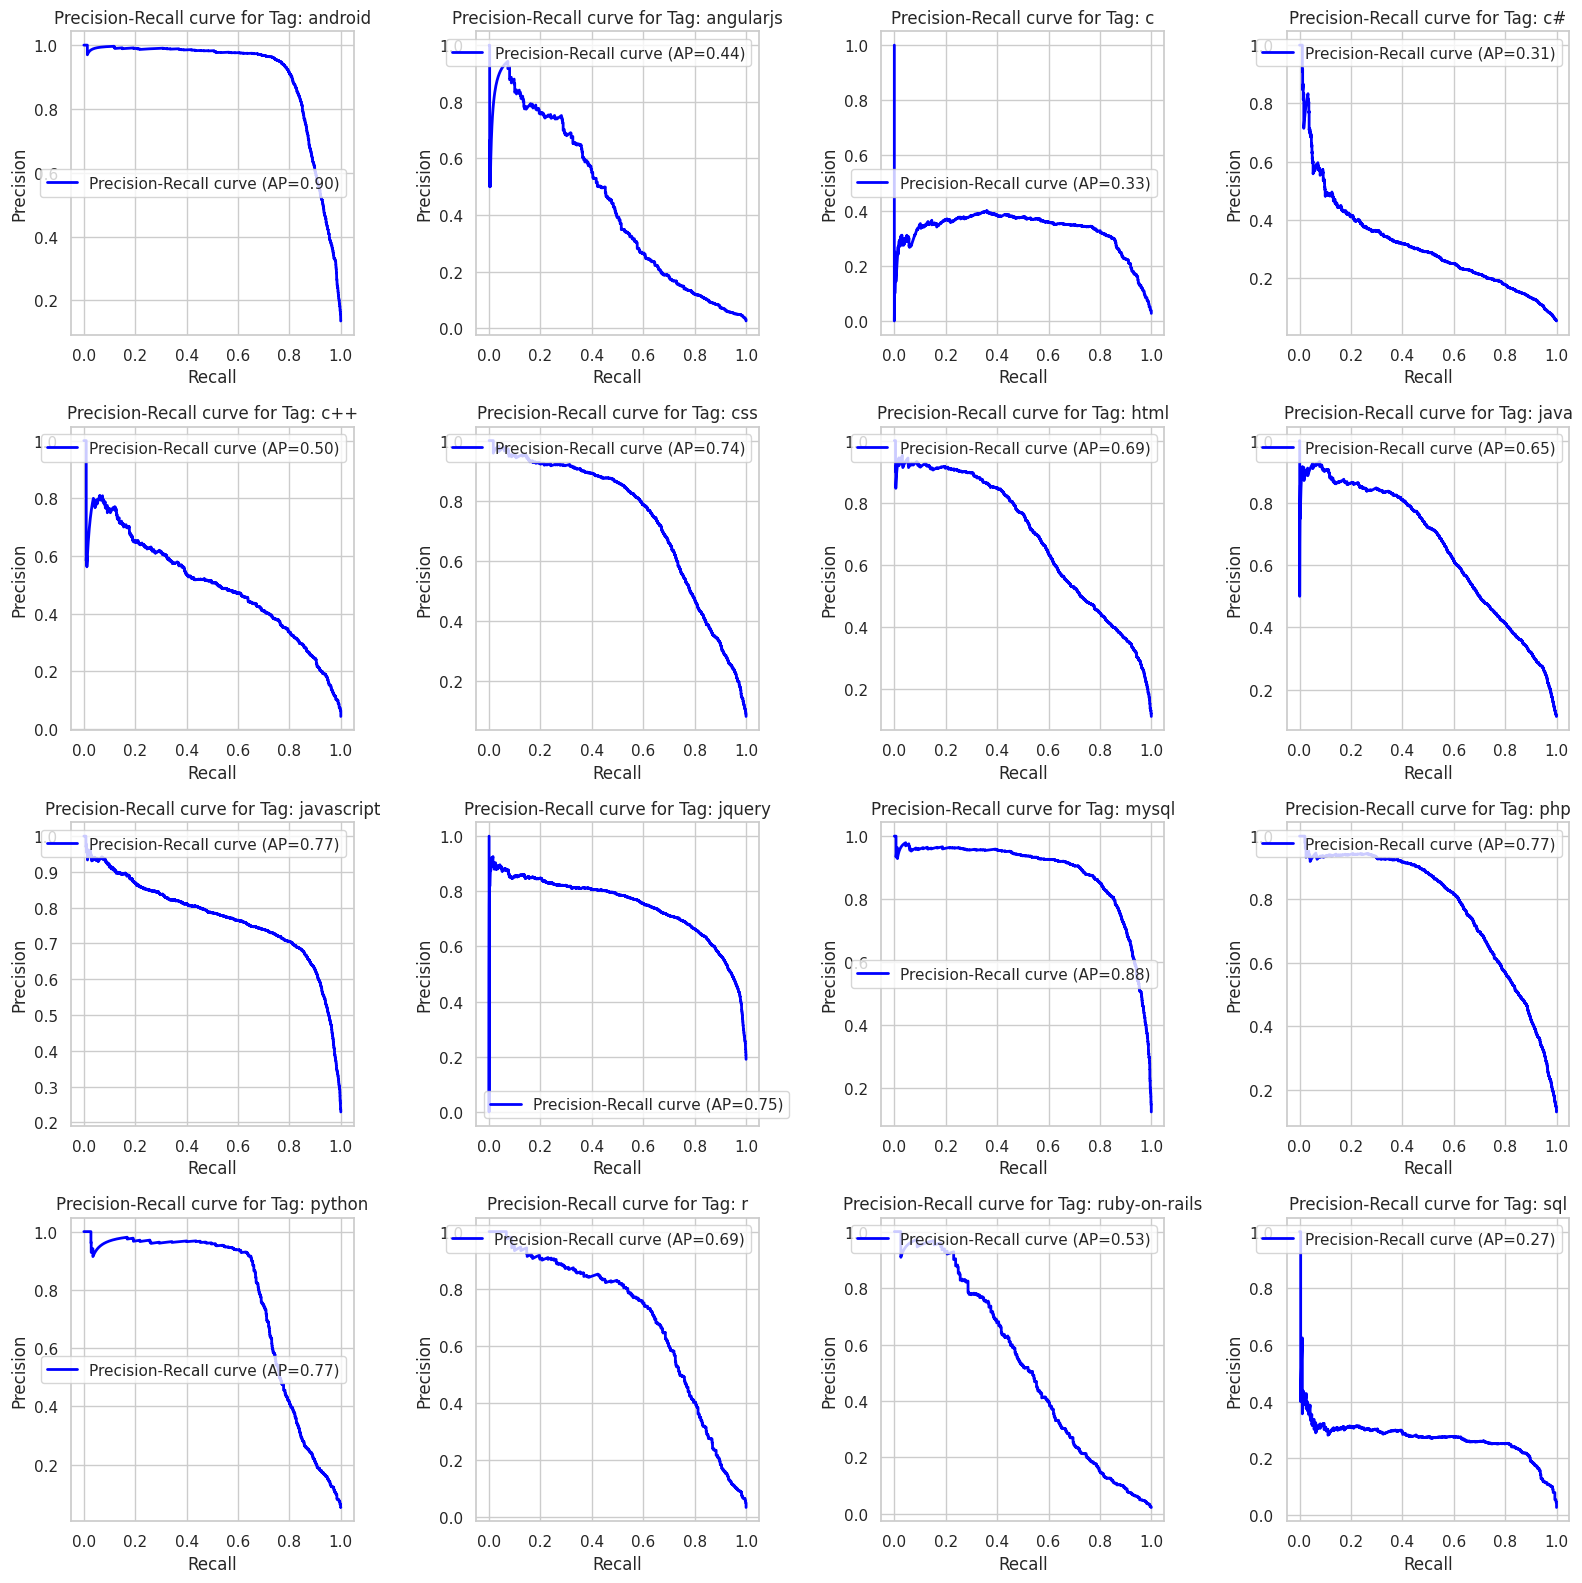

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_true =y_test # actual label
y_pred = model.predict(sequence_test_padded) # Predicted labels

# Number of tags (e.g., if there are 16 tags, this will work for a 4x4 grid)
num_tags = y_true.shape[1]

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten() # Flatten the 2D axes array to make indexing easier

# Loop over all tags and plot Precision-Recall curve for each
for i in range(num_tags):
    precision, recall, _ = precision_recall_curve(y_true[:, i], y_pred[:, i])
    average_precision = average_precision_score(y_true[:, i], y_pred[:, i])

    ax = axes[i]
    ax.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP={average_precision:.2f})')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall curve for Tag: {mlb.classes_[i]}')
    ax.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# LSTM

In [ ]:
inputs = Input(shape=[seq_len])
embeded_layer = Embedding(input_dim= len(tok.index_word)+1, output_dim=100)(inputs)

lstm_layer = LSTM(units=64)(embeded_layer)

dense1 = Dense(units=32, activation='relu')(lstm_layer)
batch1 = BatchNormalization()(dense1)
drop1 = Dropout(rate=0.25)(batch1)

output = Dense(units=y.shape[1], activation='sigmoid')(drop1)

lstm_model = Model(inputs=inputs, outputs=output)


problem is binary classification or multi-label classification then only can use AUC

In [ ]:
# Compile LSTM model with accuracy and ROC-AUC as metrics
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

In [ ]:
lstm_model.fit(sequence_train_padded, y_train, epochs=10, batch_size=128,
          validation_data=(sequence_test_padded, y_test), callbacks=[earlystop])

Epoch 1/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 294s 535ms/step - AUC: 0.7669 - accuracy: 0.3609 - loss: 0.4409 - val_AUC: 0.9546 - val_accuracy: 0.5359 - val_loss: 0.1382
Epoch 2/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 329s 548ms/step - AUC: 0.9564 - accuracy: 0.6012 - loss: 0.1322 - val_AUC: 0.9686 - val_accuracy: 0.6222 - val_loss: 0.1117
Epoch 3/10
539/539 ━━━━━━━━━━━━━━━━━━━━ 320s 544ms/step - AUC: 0.9740 - accuracy: 0.6728 - loss: 0.1025 - val_AUC: 0.9681 - val_accuracy: 0.6329 - val_loss: 0.1107


In [ ]:
y_pred = lstm_model.predict(sequence_test_padded, batch_size=128, verbose=0)
y_true = y_test

In [ ]:
# Convert probabilities to binary labels (0 or 1) using a threshold (e.g., 0.5)
threshold = 0.5
predictions_binary = (y_pred >= threshold).astype(int)

print(predictions_binary)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics import roc_auc_score

# For binary classification or multi-label classification
roc_auc = roc_auc_score(y_true, y_pred, average='macro', multi_class='ovr')
print(f'ROC-AUC: {roc_auc:.2f}')


ROC-AUC: 0.94


Heatmap for ROC-AUC values similar to a confusion matrix.<br>visualize the ROC-AUC for each tag, create a heatmap where the rows and columns represent the tags, and the values represent the ROC-AUC scores between them.

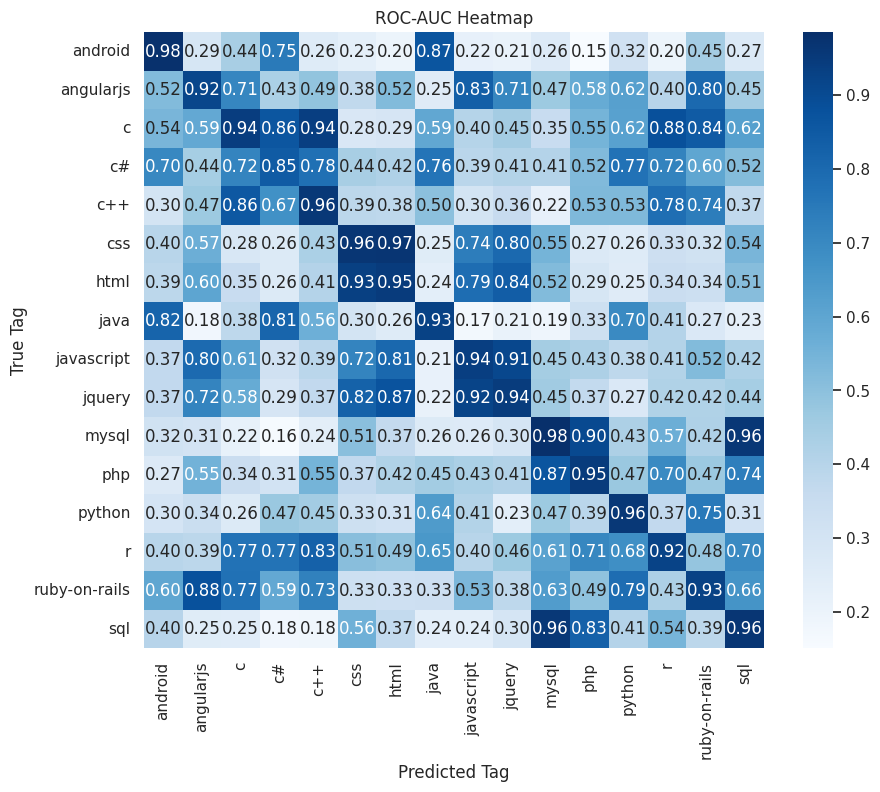

In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# y_true and y_pred are true and predicted labels

# Compute ROC-AUC for each tag (column-wise)
roc_auc_matrix = np.zeros((y_true.shape[1], y_true.shape[1]))
for i in range(y_true.shape[1]):
    for j in range(y_true.shape[1]):
        roc_auc_matrix[i, j] = roc_auc_score(y_true[:, i], y_pred[:, j])

# Plotting the ROC-AUC heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(roc_auc_matrix, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=mlb.classes_, yticklabels=mlb.classes_)
plt.title('ROC-AUC Heatmap')
plt.xlabel('Predicted Tag')
plt.ylabel('True Tag')
plt.show()
